In [1]:
import pandas as pd
import numpy as np

In [2]:
people = list(np.random.randint(50000,100000000,size=3))
country = ['Taiwan', 'UnitedStates', 'Thailand']

data = {'Country' : country, 'people' : people}
data

{'Country': ['Taiwan', 'UnitedStates', 'Thailand'],
 'people': [2233850, 86072558, 71155939]}

In [3]:
df = pd.DataFrame(data)
df

,Country,people
0,Taiwan,2233850
1,UnitedStates,86072558
2,Thailand,71155939


In [4]:
import requests

try:
    url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
    resp = requests.get(url)

    if resp.status_code != 200:
        print('Failed to load website.')
    
except Exception as e:
    print(e.message)

In [5]:
data = resp.text
data = data.split('\n')
data[1:10]

['n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'n00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'n00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'n00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'n00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg',
 'n00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg']

In [6]:
arranged_data = []

for line in data:
    arranged_data.append(line.split('\t'))

In [7]:
arranged_data

[['n00015388_157',
  'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
 ['n00015388_238',
  'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'],
 ['n00015388_304',
  'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'],
 ['n00015388_327',
  'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'],
 ['n00015388_355',
  'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
 ['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg'],
 ['n00015388_379',
  'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg'],
 ['n00015388_388',
  'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg'],
 ['n00015388_442',
  'http://www.porschemania.it/discus/messages/815/102099.jpg'],
 ['n00015388_474',
  'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'],
 ['n00015388_514',
  'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jp

In [8]:
df = pd.DataFrame(arranged_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [9]:
df.loc[0,1]

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

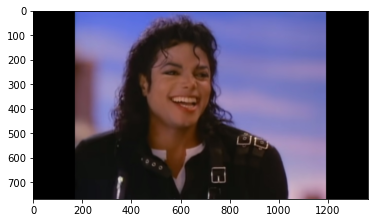

In [14]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]
first_link = 'https://i.imgur.com/K49xaf6.jpg'

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [15]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    
    for url in url_list:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            
            if resize:
                img.resize((256, 256))
            
            img = np.array(img)
            img_list.append(img)
            
        except Exception as e:
            print(e)       
    
    return img_list

In [16]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

HTTPConnectionPool(host='farm1.static.flickr.com', port=80): Max retries exceeded with url: /145/430300483_21e993670c.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x13DFE7D8>: Failed to establish a new connection: [WinError 10060] 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。'))
HTTPConnectionPool(host='farm2.static.flickr.com', port=80): Max retries exceeded with url: /1005/3352960681_37b9c1d27b.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x13DFEAF0>: Failed to establish a new connection: [WinError 10060] 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。'))
HTTPConnectionPool(host='farm1.static.flickr.com', port=80): Max retries exceeded with url: /27/51009336_a9663af3dd.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1367B8B0>: Failed to establish a new connection: [WinError 10060] 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。'))
HTTPConnectionPool(host='farm4.static.flickr.com', p